In [1]:
# import necessary libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix

In [2]:
# load the dataset
df = pd.read_csv(r'D:\OneDrive - NITT\Custom_Download\fall2022Placement.csv')

# disply top 5 lines
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0,Placed


In [3]:
df.head().T

,0,1,2,3,4
sl_no,1,2,3,4,5
gender,M,M,M,M,M
ssc_p,67.0,79.33,65.0,56.0,85.8
ssc_b,Others,Central,Central,Central,Central
hsc_p,91.0,78.33,68.0,52.0,73.6
hsc_b,Others,Others,Central,Central,Central
hsc_s,Commerce,Science,Arts,Science,Commerce
degree_p,58.0,77.48,64.0,52.0,73.3
degree_t,Sci&Tech,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt
workex,No,Yes,No,No,No


# Cleanse

In [3]:
# compute number of NaN for individual columns
x = df.isna().sum()
x

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              2
hsc_b              0
hsc_s              1
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     1
mba_p              0
salary            67
status             0
dtype: int64

In [4]:
# filter the columns which contain NaN/Missing values 
x[x!=0]

hsc_p              2
hsc_s              1
specialisation     1
salary            67
dtype: int64

In [5]:
# check the datatypes
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
salary            float64
status             object
dtype: object

In [6]:
# fill NaN with mean of the same column, if column is of type int or float
df['hsc_p'] = df['hsc_p'].fillna(df['hsc_p'].mean())

# fill NaN with most frequent value of the same column, if column is of type object i.e string
most_frequent_hs = df['hsc_s'].mode().tolist()[0]
df['hsc_s'] = df['hsc_s'].fillna(most_frequent_hs)

most_frequent_sp = df['specialisation'].mode().tolist()[0]
df['specialisation'] = df['specialisation'].fillna(most_frequent_sp)

# fill NaN with mean of the same column, if column is of type int or float
df['salary'] = df['salary'].fillna(df['salary'].mean())

In [7]:
# again check for NaN , just to verify whether NaN have been filled or not
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
status            0
dtype: int64

# Outliers

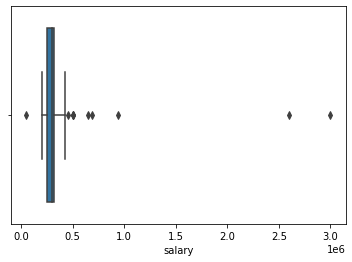

In [8]:
# Box Plot
import seaborn as sns
sns.boxplot(df['salary'])
plt.show()

- we can see most of the data is <= 0.5*(10**6), therefore remove all rows with salary > 0.5*(10**6)

In [9]:
# salary threshold , considered based on boxplot
th = 0.5*(10**6)

In [10]:
df.shape # current shape

(215, 15)

In [11]:
# filter the dataframe to consider only rows having salary <= th
df = df[df['salary']<=th]

In [12]:
df.shape # check the shape after above operation

(210, 15)

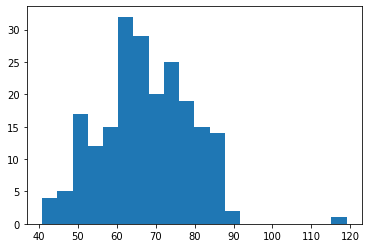

In [13]:
# check for histogram of ssc_p
plt.hist(df['ssc_p'],bins=20)
plt.show()

- we can see that for few student Secondary Education percentile is more than 100, which is not possible and can be considered as outliers

In [14]:
# filter the dataframe
df = df[df['ssc_p']<=100]

In [15]:
df.shape # new shape

(209, 15)

# Who are these graduates ?

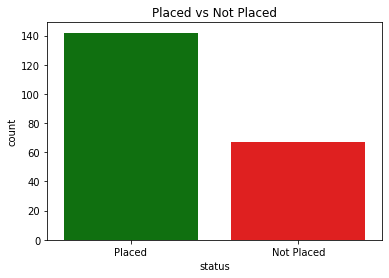

In [16]:
# countplot to show Placed vs Not Placed
sb.countplot(df['status'],palette=['green','red'])
plt.title('Placed vs Not Placed')
plt.show()

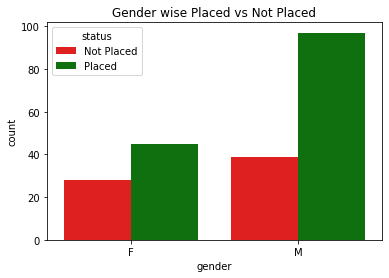

In [17]:
# group 'gender' and 'status' 
gender_df = df.groupby(['gender','status'])['status'].count()
gender_df = pd.DataFrame(gender_df)
gender_df.columns = ['count']
gender_df = gender_df.reset_index()

# barplot to show Gender wise Placed vs Not Placed
sb.barplot(x="gender",y="count",hue="status",data=gender_df,palette=['red','green'])
plt.title('Gender wise Placed vs Not Placed')
plt.show()

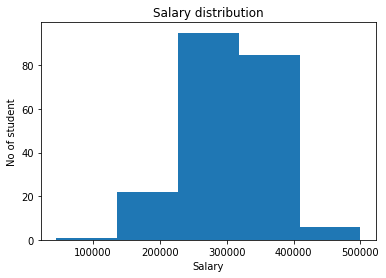

In [18]:
# histogram to show Salary distribution
plt.hist(df['salary'],bins=5)
plt.xlabel('Salary')
plt.ylabel('No of student')
plt.title('Salary distribution')
plt.show()

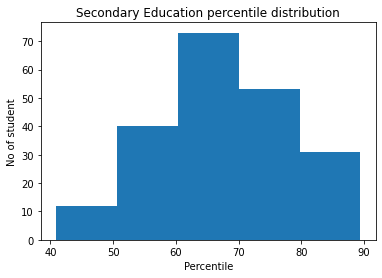

In [19]:
# histogram to show Secondary Education percentil distribution
plt.hist(df['ssc_p'],bins=5)
plt.xlabel('Percentile')
plt.ylabel('No of student')
plt.title('Secondary Education percentile distribution')
plt.show()

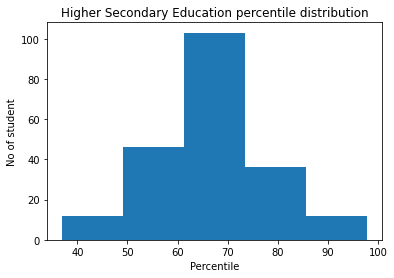

In [20]:
# histogram to show Higher Education percentil distribution
plt.hist(df['hsc_p'],bins=5)
plt.xlabel('Percentile')
plt.ylabel('No of student')
plt.title('Higher Secondary Education percentile distribution')
plt.show()

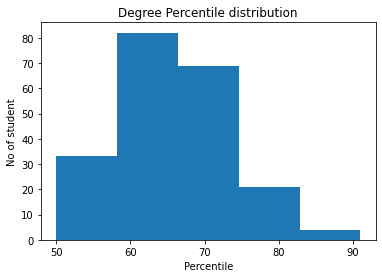

In [21]:
# histogram to show Degree percentil distribution
plt.hist(df['degree_p'],bins=5)
plt.xlabel('Percentile')
plt.ylabel('No of student')
plt.title('Degree Percentile distribution')
plt.show()

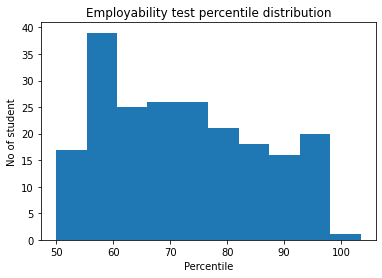

In [22]:
# histogram to show Employability percentil distribution
plt.hist(df['etest_p'],bins=10)
plt.xlabel('Percentile')
plt.ylabel('No of student')
plt.title('Employability test percentile distribution')
plt.show()

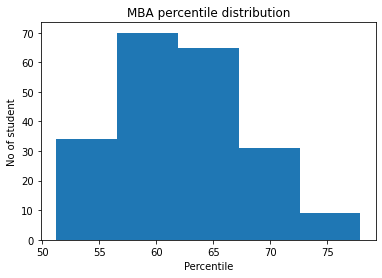

In [23]:
# histogram to show MBA percentil distribution
plt.hist(df['mba_p'],bins=5)
plt.xlabel('Percentile')
plt.ylabel('No of student')
plt.title('MBA percentile distribution')
plt.show()

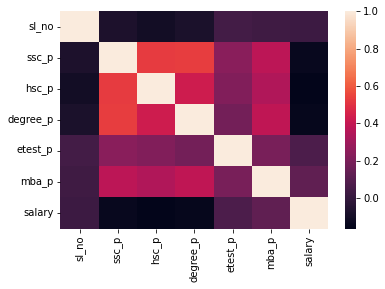

In [24]:
# correlation heatmap to check for weak/strong correlation amoung features
sns.heatmap(df.corr())
plt.show()

- It has been found that features are weakly correlated 

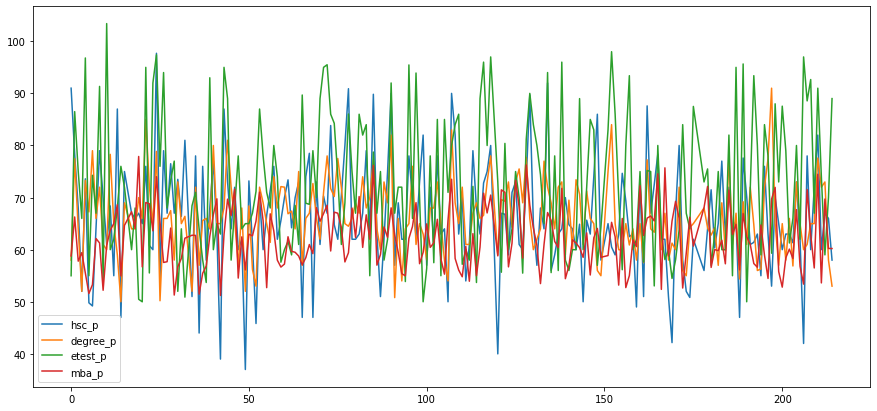

In [25]:
# trend line for different percentil
df[['hsc_p','degree_p','etest_p','mba_p']].plot(figsize=(15,7))
plt.legend()
plt.show()

# Who are most likely to get placed?

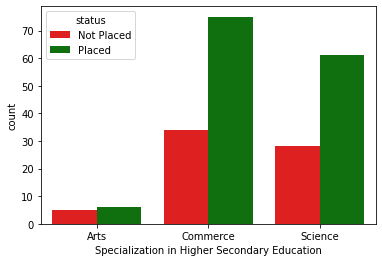

In [26]:
# group by hsc_s and status
gender_df = df.groupby(['hsc_s','status'])['status'].count()
gender_df = pd.DataFrame(gender_df)
gender_df.columns = ['count']
gender_df = gender_df.reset_index()


#barplot to show hsc_s wise Placed vs Not Placed
sb.barplot(x="hsc_s",y="count",hue="status",data=gender_df,palette=['red','green'])
plt.xlabel("Specialization in Higher Secondary Education")
plt.show()

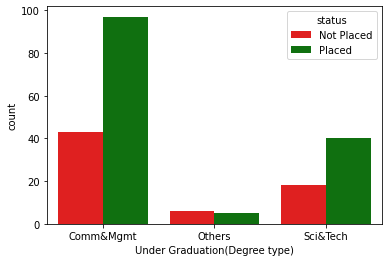

In [27]:
# group by degree_t and status
gender_df = df.groupby(['degree_t','status'])['status'].count()
gender_df = pd.DataFrame(gender_df)
gender_df.columns = ['count']
gender_df = gender_df.reset_index()

#barplot to show degree_t wise Placed vs Not Placed
sb.barplot(x="degree_t",y="count",hue="status",data=gender_df,palette=['red','green'])
plt.xlabel('Under Graduation(Degree type)')
plt.show()

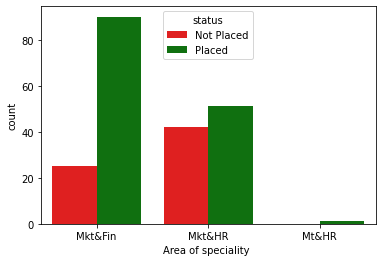

In [28]:
# group by specialisation and status
gender_df = df.groupby(['specialisation','status'])['status'].count()
gender_df = pd.DataFrame(gender_df)
gender_df.columns = ['count']
gender_df = gender_df.reset_index()

#barplot to show specialisation wise Placed vs Not Placed
sb.barplot(x="specialisation",y="count",hue="status",data=gender_df,palette=['red','green'])
plt.xlabel("Area of speciality ")
plt.show()

# Prepare the data for a regression analysis

In [29]:
# drop Serial Number column, as its of no use
df.drop('sl_no',axis=1,inplace=True)

In [30]:
# get X and y
X = df.drop('status',axis=1)
y = df['status']

In [31]:
# convert categorical features to one hot encoding i.e numeric features
# so as to make the features ready for machine learning model input
X = pd.get_dummies(X)

In [32]:
# Splitting the dataset into the Training set and Test set
# training set:- 75%
# test set: 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Run the regression analysis

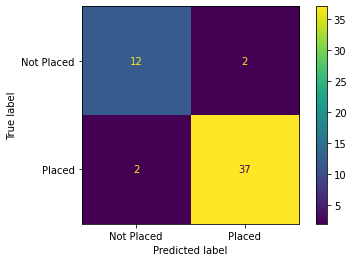

In [34]:
# build LogisticRegression model
clf_lr = LogisticRegression(random_state = 0)
clf_lr.fit(X_train, y_train)

# make prediction on test set
y_pred = clf_lr.predict(X_test)

# store model accuracy
acc_lr = accuracy_score(y_test,y_pred)

# plot confusion_matrix
plot_confusion_matrix(clf_lr, X_test, y_test)  
plt.show()

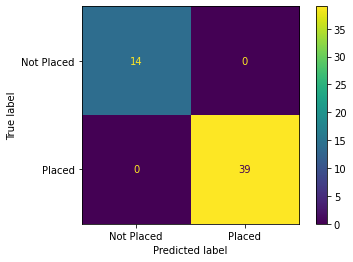

In [35]:
# build DecisionTreeClassifier model
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt.fit(X_train, y_train)

# make prediction on test set
y_pred = clf_dt.predict(X_test)

# store model accuracy
acc_dt = accuracy_score(y_test,y_pred)

# plot confusion_matrix
plot_confusion_matrix(clf_dt, X_test, y_test)  
plt.show()

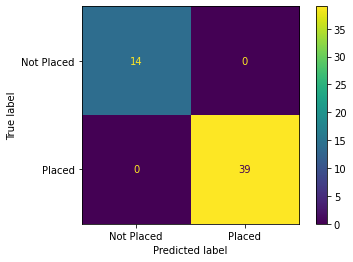

In [36]:
# build RandomForestClassifier model
clf_rf = RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train, y_train)

# make prediction on test set
y_pred = clf_rf.predict(X_test)

# store model accuracy
acc_rf = accuracy_score(y_test,y_pred)

# plot confusion_matrix
plot_confusion_matrix(clf_rf, X_test, y_test)  
plt.show()

# Model Comparision

In [37]:
# create daraframe to store model name and respective accuracy
results = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier'],
    'Accuracy (%)': [acc_lr*100,acc_dt*100,acc_rf*100]})

result_df = results.sort_values(by='Accuracy (%)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy (%)
Model,
DecisionTreeClassifier,100.00000
RandomForestClassifier,100.00000
LogisticRegression,92.45283
